Name: Kaiyue Ma
Student ID: 1006714129

PART I

In [32]:
import pandas as pd; import numpy as np; from scipy import stats; import matplotlib.pyplot as plt;
url = 'https://github.com/Kaiyue2003/STA365-Assignments/blob/main/framingham.csv?raw=true'
data = pd.read_csv(url)

In [2]:
cleaned_data = data.dropna()
cleaned_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


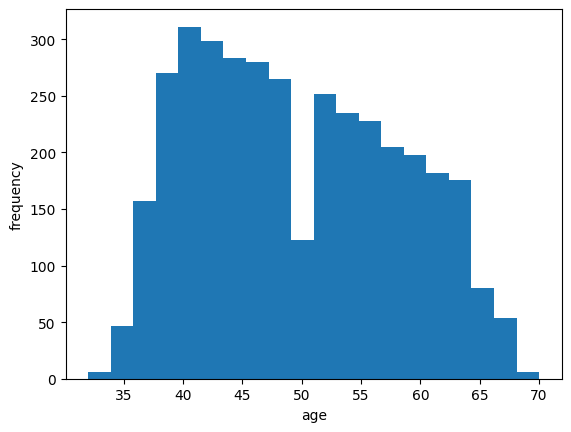

In [3]:
# Exploratory Data Analysis
plt.hist(cleaned_data['age'],bins=20)
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

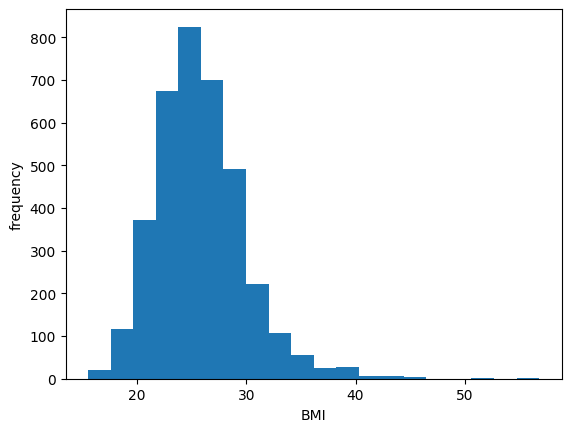

In [4]:
# Exploratory Data Analysis
plt.hist(cleaned_data['BMI'],bins=20)
plt.xlabel('BMI')
plt.ylabel('frequency')
plt.show()

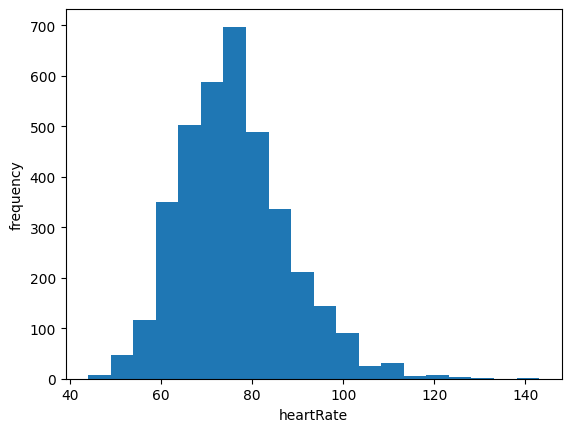

In [5]:
# Exploratory Data Analysis
plt.hist(cleaned_data['heartRate'],bins=20)
plt.xlabel('heartRate')
plt.ylabel('frequency')
plt.show()

In [78]:
x1 = cleaned_data['age']
x2 = cleaned_data['BMI']
x3 = cleaned_data['heartRate']
num_obs = len(x1)
intercept = np.ones((num_obs,1))
X = np.zeros((len(x1),4))
# standardize the predictor values
X[:, 0] = intercept.reshape(-1)
X[:,1] = (x1-np.mean(x1))/np.std(x1)
X[:,2] = (x2-np.mean(x2))/np.std(x2)
X[:,3] = (x3-np.mean(x3))/np.std(x3)
print(X)

[[ 1.         -1.23335117  0.29168785  0.35633992]
 [ 1.         -0.41559058  0.7246142   1.60828949]
 [ 1.         -0.1819447  -0.10926099 -0.06097661]
 ...
 [ 1.          0.05170118  0.04570696 -0.81214636]
 [ 1.          0.16852412 -1.49413337 -0.89560966]
 [ 1.          0.28534706 -1.06120701  0.35633992]]


In [79]:
y2 = np.zeros((num_obs,1))
y2[:,0] = cleaned_data['TenYearCHD']
print(y2)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [80]:
import pymc as pm; import numpy as np
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu= np.zeros((4,1)), cov=np.eye(4), shape=(4,1))
    y = pm.Bernoulli('y', logit_p = pm.math.dot(X, betas), observed = y2)
with MLR:
    idata = pm.sample()


HMC Split-Rhats {'betas': array([[1.0007, 1.0004, 1.0011, 1.0014],
       [1.0039, 1.0022, 0.9995, 0.9992],
       [1.0014, 1.0007, 1.0018, 0.9999],
       [1.0016, 1.0057, 1.0033, 1.0002]])} | 

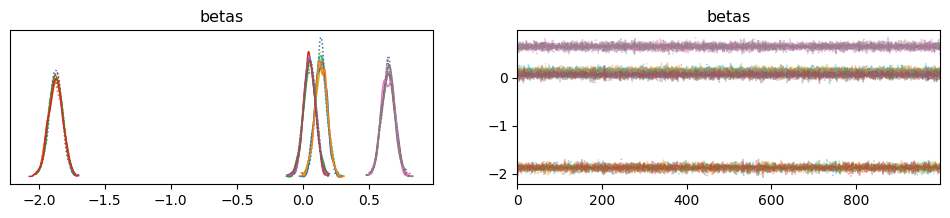

In [81]:
import arviz as az; import matplotlib.pyplot as plt;
az.plot_trace(idata);
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata).items()}, end=' | ')
# None of the split R hats values is greater than 1.05 and there is no sign of divergence.

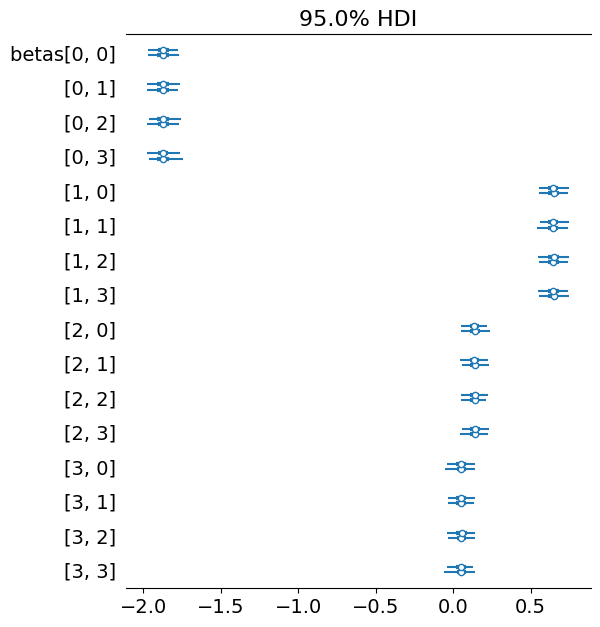

In [82]:
# 95% credible interval of mu, nu, and tau_sq
import arviz as az; import matplotlib.pyplot as plt;
az.plot_forest(idata, var_names=["betas"], combined=False, hdi_prob=0.95);

PART II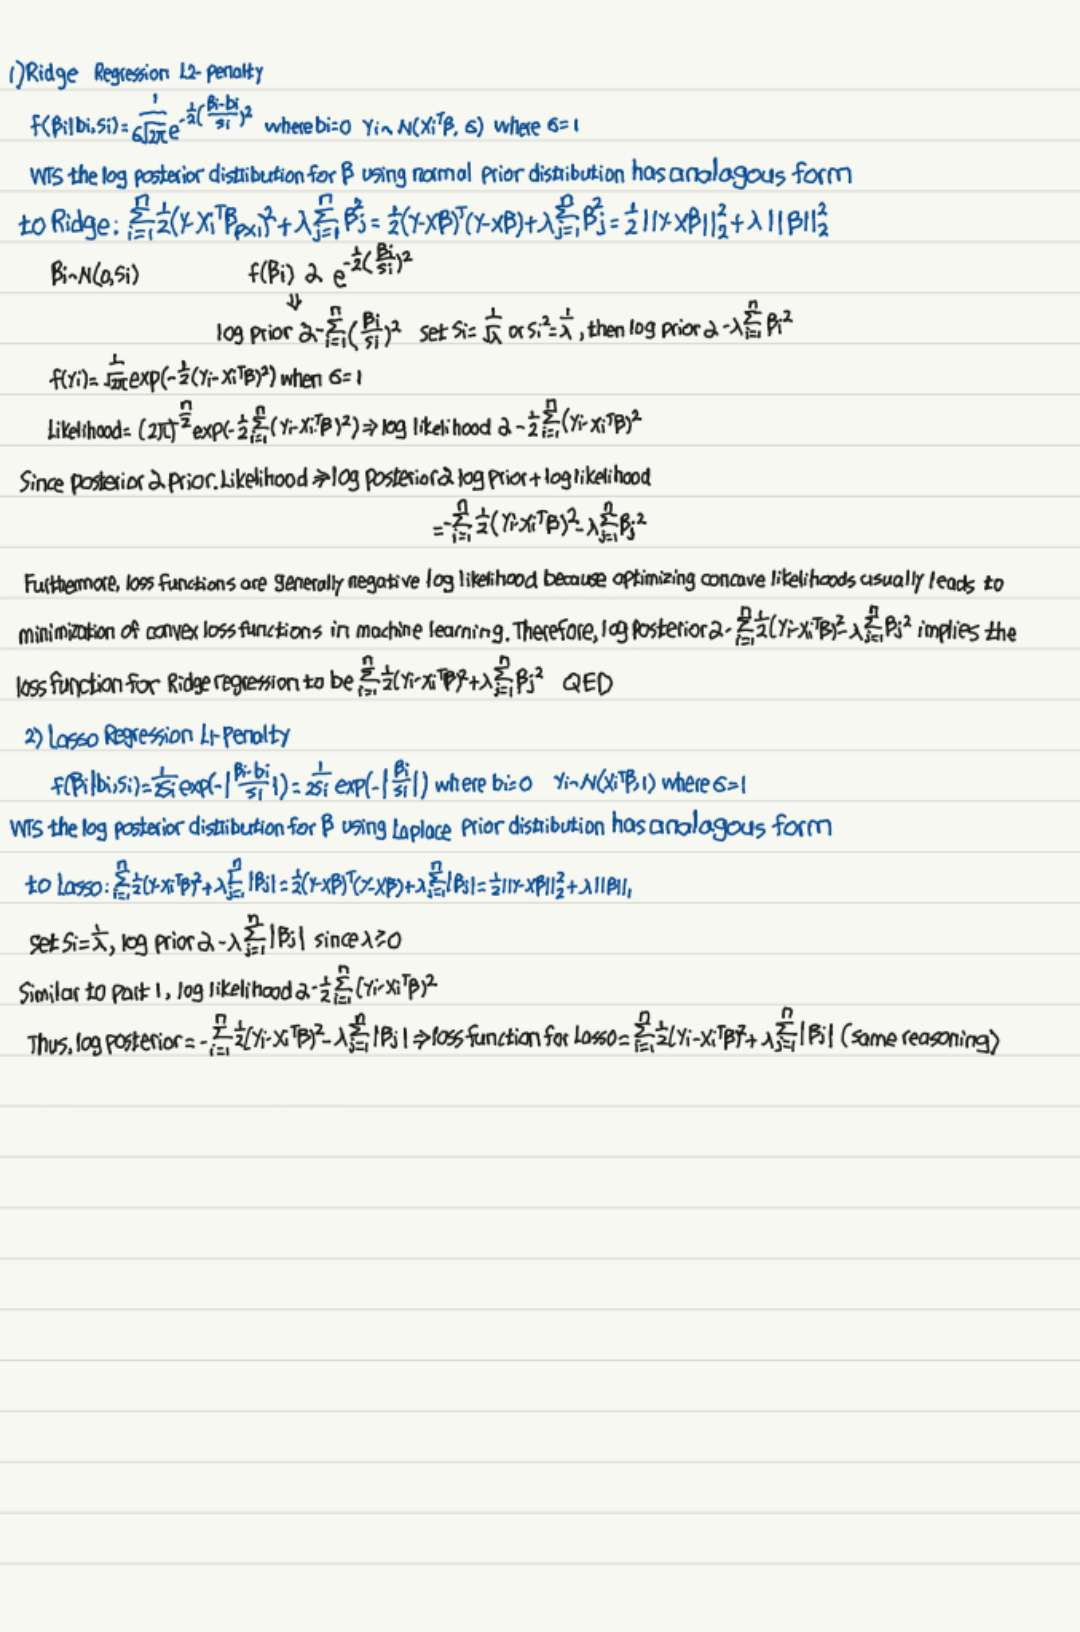

Bayesians do not optimize posterior distributions, they sample from them; but, the posterior distributions are nonetheless 'regularizations' of the likelihood through the prior. It is because Bayesians also want to avoid overfitting issues and they impose regularization through priors. Furthermore, Bayesians care about the samples from the posterior distribution instead of the posterior itself.